In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.colors as mcolors

import scipy as sc
from scipy.optimize import leastsq
from fiblat import sphere_lattice

In [24]:
# stroboscopic map
def functionF(J, k, p, beta):
    x, y, z = J
    cos_p = np.cos(p)
    sin_p = np.sin(p)

    z1 = z * cos_p - x * sin_p
    xz = x * cos_p + z * sin_p
    angle = k * z1
    cos_kz = np.cos(angle)
    sin_kz = np.sin(angle)

    x1 = xz * cos_kz - y * sin_kz
    y1 = xz * sin_kz + y * cos_kz

    # beta rotation
    angle_beta = 2 * k * beta
    cos_beta = np.cos(angle_beta)
    sin_beta = np.sin(angle_beta)

    x1b = x1 * cos_beta + y1 * sin_beta
    y1b = y1 * cos_beta - x1 * sin_beta
    z1b = z1

    return np.array([x1b, y1b, z1b])


# evolution
def evolve_system(J_init, N_ita, N_points, k_array, p, beta):
    J = np.zeros((N_points, 3, len(k_array), N_ita))

    for i in range(N_points):
        for ik, k_val in enumerate(k_array):
            J[i, :, ik, 0] = J_init[i]
            for t in range(1, N_ita):
                J[i, :, ik, t] = functionF(J[i, :, ik, t - 1], k_val, p, beta)

    return J


# from sphere to decart
def decart_to_sphere(x: float, y: float, z: float) -> tuple:
    r = np.sqrt(x**2 + y**2 + z**2)
    if r == 0:
        raise ValueError("Radius cannot be zero")

    theta = np.arccos(z / r)  # [0, pi]
    phi = np.mod(np.arctan2(y, x), 2 * np.pi)  # [0, 2pi)

    return theta, phi


N_points = 500
N_ita = 100
p = 1.73
beta = 0.1
k = np.arange(0, 5, 0.2)
n_k = len(k)

J_init = sphere_lattice(3, N_points)  # Fibonacci method - uniform distributon on a sphere

J_fin = evolve_system(J_init, N_ita, N_points, k, p, beta)


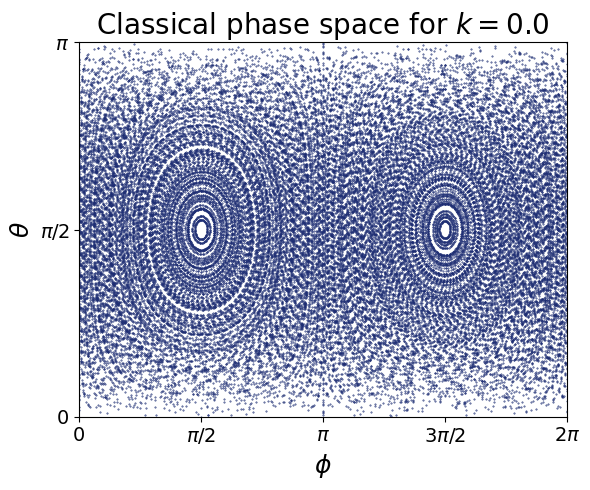

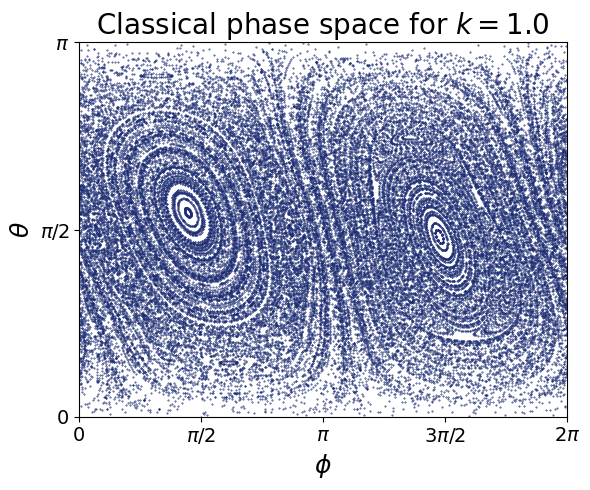

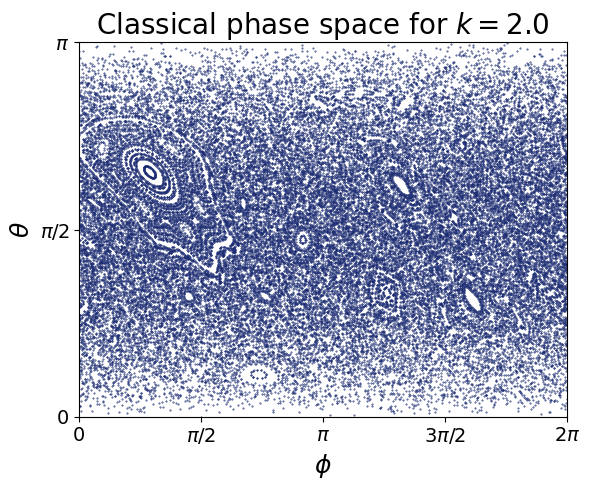

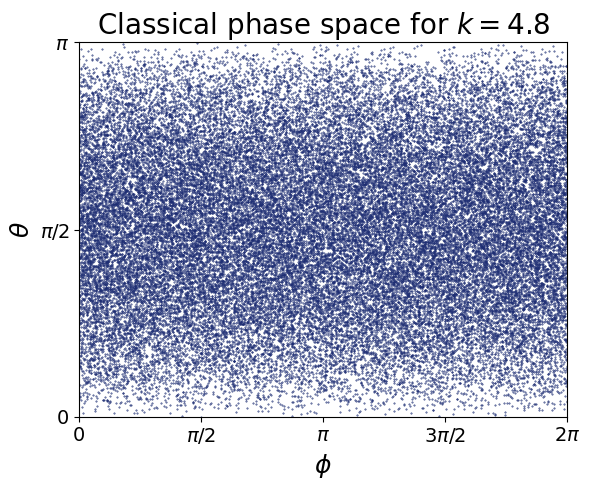

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# visualization
theta = np.zeros((N_points, n_k, N_ita))
phi = np.zeros((N_points, n_k, N_ita))

for i in range(N_points):
    for ik in range(n_k):
        for t in range(N_ita):
            x, y, z = J_fin[i, :, ik, t]
            theta[i, ik, t], phi[i, ik, t] = decart_to_sphere(x, y, z)

def format_radians(value, pos=None):
    labels = {
        0: '0', np.pi/2: r'$\pi/2$', np.pi: r'$\pi$', 3*np.pi/2: r'$3\pi/2$', 2*np.pi: r'$2\pi$',
        -np.pi/2: r'$-\pi/2$', -np.pi: r'$-\pi$', -3*np.pi/2: r'$-3\pi/2$', -2*np.pi: r'$-2\pi$'
    }
    for key in labels:
        if np.isclose(value, key):
            return labels[key]
    return f'{value/np.pi:.1f}$\pi$'

rgb_color = (29/255, 45/255, 115/255)

for ik in [0, 5, 10, 24]:
    plt.figure(figsize=(6, 5))
    
    for ph, th in zip(phi[:, ik, :], theta[:, ik, :]):
        plt.plot(ph, th, 'o', ms=0.4, color=rgb_color)

    plt.xlim(0, 2 * np.pi)
    plt.ylim(0, np.pi)
    plt.xlabel(r'$\phi$', fontsize=18)
    plt.ylabel(r'$\theta$', fontsize=18)
    plt.title(f'Classical phase space for $k = {k[ik]:.1f}$', fontsize=20)

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(np.pi/2))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_radians))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(np.pi/2))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_radians))
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()
